# Визуализация данных

* [Matplotlib](#Matplotlib)
* [Pandas' buildin plotting](#Pandas'-buildin-plotting)
* [Seaborn](#Seaborn)
* [Bokeh](#Bokeh)
* [Holoviews](#Holoviews)
* [Дополнительные материалы](#Дополнительные-материалы)
* [Домашнее задание](#Домашнее-задание)

Диаграммы мы будем рассматривать на примере выборки бриллиантов [diamonds](https://www.kaggle.com/shivam2503/diamonds).
Выборка содержит 54к различных бриллианта с характеристиками:

* **price** - цена (\$326--\$18,823)
* **carat** - вес бриллианта (0.2--5.01)
* **cut** - качество (Fair, Good, Very Good, Premium, Ideal)
* **color** - цвет, от J (худший) до D (лучший)
* **clarity** - мера чистоты бриллианта (I1 (худший), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (лучший))
* **x** - длина в мм (0--10.74)
* **y** - ширина в мм (0--58.9)
* **z** - глубина в мм (0--31.8)
* **depth** - общая глубина в процентах  $\frac{z}{mean(x, y)} = \frac{2z}{(x + y)}$ (43--79)
* **table** - width of top of diamond relative to widest point (43--95)

In [1]:
import pandas as pd
import numpy as np

In [2]:
diamonds_url = 'http://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv'

cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

df = pd.read_csv(diamonds_url, usecols='carat cut color clarity depth table price x y z'.split())

for column, order in [('cut', cut_order),
                      ('clarity', clarity_order),
                      ('color', color_order)]:
    df[column] = df[column].astype('category').cat.set_categories(order, ordered=True)

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# [Matplotlib](https://matplotlib.org)

Базовая библиотека по визуализации в python. На её основе сделано много других библиотек, таких как seaborn, pandas'овский `.plot()`, holoviews. Предоставляет обширные возможности, но иногда за счет размера кода. Основное удобное API - [`pyplot()`](http://matplotlib.org/api/pyplot_api.html).

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

У объекта **`ax`** (axes) - оси координат, вызываем отдельные методы (рисование диаграммы рассеивания, подпись оси, ...).  

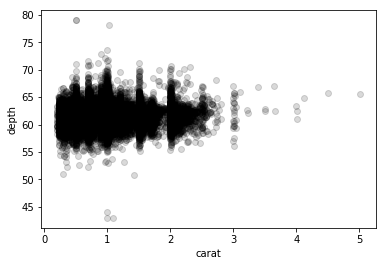

In [5]:
fig, ax = plt.subplots()

ax.scatter(x='carat', y='depth', data=df, c='k', alpha=.15)
ax.set_xlabel('carat')
ax.set_ylabel('depth');

Есть интерфейс создания графиков напрямую через вызовы методов pyplot - это API ближе к Matlab.

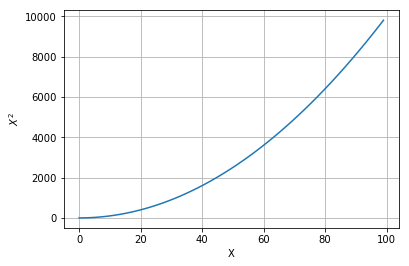

In [6]:
x = np.arange(100)

plt.plot(x, np.power(x, 2))
plt.xlabel('X')
plt.ylabel('$X^2$')
plt.grid(True);

# [Pandas' buildin-plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Встроенный метод **`.plot()`** у объектов **`DataFrame`** и **`Series`** позволяет рисовать большое количество полезных статистических графиков (line, scatter, bar-chart, ...). Очень удобен для исследования "на лету".

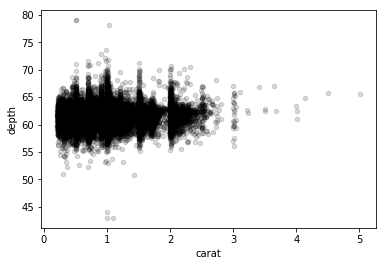

In [7]:
df.plot.scatter(x='carat', y='depth', c='k', alpha=.15);

Установим библиотеку для скачивания различных данных.

In [8]:
# !pip install pandas-datareader

In [9]:
from pandas_datareader import fred

gdp = fred.FredReader(['GCEC96', 'GPDIC96'], start='2000-01-01').read()
gdp.head(2)

,GCEC96,GPDIC96
DATE,,
2000-01-01,2476.222,2287.827
2000-04-01,2506.392,2424.549


Для рисования сразу нескольких графиков необходимо, чтобы каждому соответствовал свой столбец. В pandas можно одним вызовом plot нарисовать сразу все столбцы (индекс, тогда будет за горизонтальную ось).

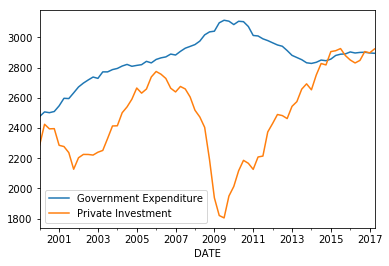

In [10]:
# f, ax = plt.subplots(figsize=(10, 5))

(gdp.rename(columns={"GCEC96": "Government Expenditure",
                     "GPDIC96": "Private Investment"})
    .plot());

# [Seaborn](http://seaborn.pydata.org)

Высокоуровневое API для посторения статистических графиков на основе matplotlib.

In [11]:
import seaborn as sns

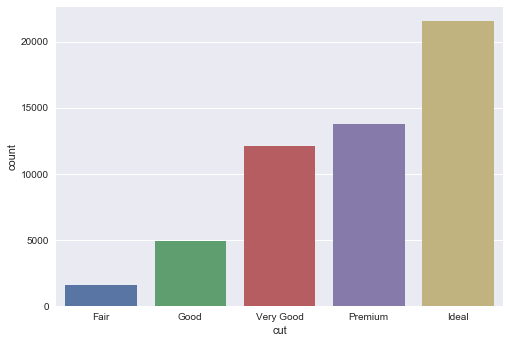

In [12]:
sns.countplot(x='cut', data=df);

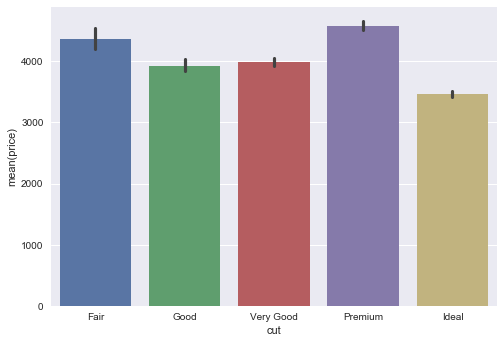

In [13]:
sns.barplot(x='cut', y='price', data=df);

Есть очень удобная диаграмма для сравнения двух параметров.

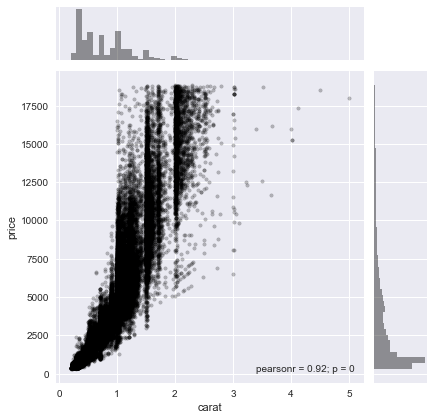

In [14]:
sns.jointplot(x='carat', y='price', data=df, size=6, alpha=.25,
              color='k', marker='.');

Есть очень мощный инструмент, рисующий диаграммы рассеивания сразу для всех пар признаков.

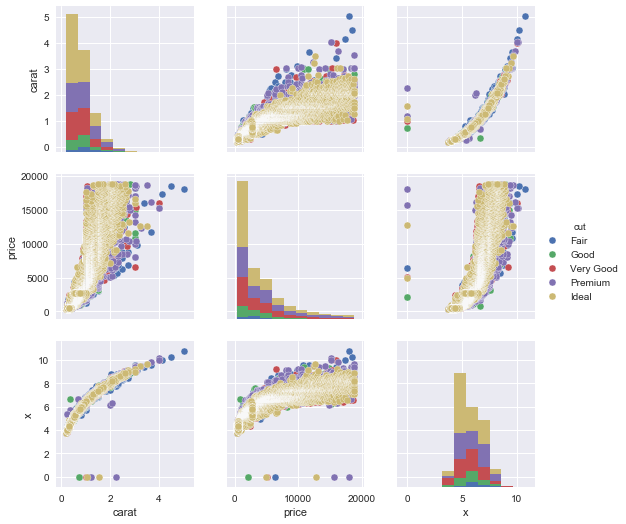

In [15]:
(df.loc[:, ['carat', 'price', 'x', 'cut']]
   .pipe(sns.pairplot, hue='cut'));

Большинсово функций в seaborn возвращают один график (одну систему координат Axes), а вот pairplot - целую сетку таких графиков.

In [16]:
def core(df, α=.05):
    """Take main part of dataset"""
    mask = (df > df.quantile(α)).all(1) & (df < df.quantile(1 - α)).all(1)
    return df[mask]

/Users/dmitriy/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


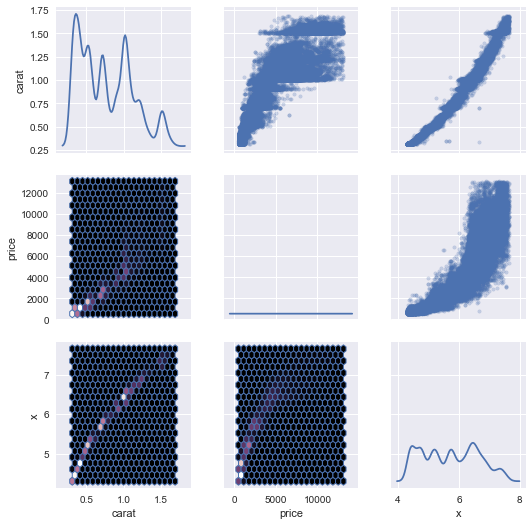

In [17]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

(df.loc[:, ['carat', 'price', 'x']]
   .pipe(core)
   .pipe(sns.PairGrid)
   .map_upper(plt.scatter, marker='.', alpha=.25)
   .map_diag(sns.kdeplot)
   .map_lower(plt.hexbin, cmap=cmap, gridsize=20)
);

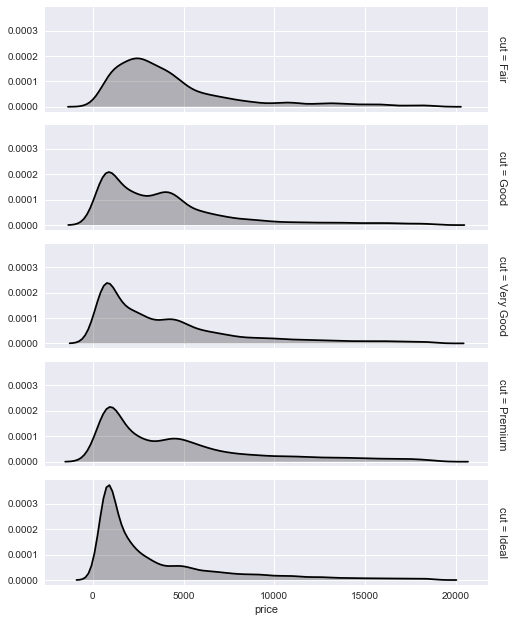

In [18]:
(sns.FacetGrid(df, row='cut', aspect=4, size=1.76, margin_titles=True)
    .map(sns.kdeplot, 'price', shade=True, color='k'));

# [Bokeh](https://bokeh.pydata.org/en/latest/)

Ориентированна на создание web графики, включающую интерактивность. Независема от matplotlib.
Есть два основных API:
* **`bokeh.charts`** - высокоуровневое, для рисования диаграмм (скоро выделется в отдельную библиотеку).
* **`bokeh.plotting`** - более мощьное, но низкоуровневое.

In [19]:
import bokeh.charts as bc

bc.output_notebook()

/Users/dmitriy/anaconda/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
The bokeh.charts API has moved to a separate 'bkcharts' package.

This compatibility shim will remain until Bokeh 1.0 is released.
After that, if you want to use this API you will have to install
the bkcharts package explicitly.

  warn(message)


Loading BokehJS ...

In [20]:
fig = (df.assign(xy = df.x / df.y)
         .sample(n=500)
         .pipe(bc.Scatter, "xy", "price"))
bc.show(fig)

Интерактивность в некоторых ситуациях очень важна, например, для рисования карт.
Выборка аэропортов: https://openflights.org/data.html.

In [21]:
import bokeh.plotting as bp
from bokeh.tile_providers import STAMEN_TONER
from bokeh.models import HoverTool
import math

In [22]:
# Скачиваем координаты всех аэропортов
airports = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat',
                       names=['Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO',
                              'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST',
                              'Tz database time zone', 'Type', 'Source'],
                       index_col='Airport ID', na_values=[r'\N'])
airports.drop(2033, inplace=True) # not valid coordinate

def mercator_from(lon, lat):
    """Convert (lattitude ,longitude) to Mercator projection
    
    >>>mercator_from(55.972599, 37.414600)
    [6230841.218188753, 4497054.321707219]
    """
    x = lon * 20037508.34 / 180
    y = math.log(math.tan((90 + lat) * math.pi / 360)) / (math.pi / 180)
    y = y * 20037508.34 / 180
    y = y  -1
    return [x, y]

# конвертим широту долготу, создавая два новых столбца
airports[['x', 'y']] = (airports.loc[:, ['Longitude', 'Latitude']]
                                .apply(lambda x: mercator_from(*x), axis=1))

airports.tail(2)

,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source,x,y
Airport ID,,,,,,,,,,,,,,,
12056,Yingkou Lanqi Airport,Yingkou,China,YKH,ZYYK,40.542524,122.358600,0,NaN,NaN,NaN,airport,OurAirports,1.362090e+07,4.945095e+06
12057,Shenyang Dongta Airport,Shenyang,China,NaN,ZYYY,41.784401,123.496002,0,NaN,NaN,NaN,airport,OurAirports,1.374751e+07,5.128737e+06


In [23]:
bound = 20000000 # meters

# Переводим данные в формат для bokeh
source = bp.ColumnDataSource(airports.sample(100).to_dict('list'))

# Создаем рисунок, указывая параметры границ о доступные виджеты
fig = bp.figure(tools='pan, wheel_zoom, reset', x_range=(-bound, bound), y_range=(-bound, bound))

# Рисуем круги
points = fig.circle(x='x', y='y', source=source, color='blue', alpha=0.3,
                    radius=10000, radius_units='data')

# Рисуем большие прозрачные круги, для удобного просмотра в масштабе
fig.circle(x='x', y='y', source=source, color='blue', 
           alpha=0.1, radius=5, radius_units='screen')

# Добавляем интерактивность при наведении курсора
fig.add_tools(HoverTool(renderers=[points],
                        tooltips=[('Name','@Name'),
                                  ('City','@City')]))

fig.axis.visible = False    # убираем рисование осей координат
fig.add_tile(STAMEN_TONER)  # подкладываем карту

bp.show(fig)

# [Holoviews](http://holoviews.org)

Высокоуровневое API для создания статистических графиков. Ориентированна на выразительность.


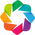

In [24]:
import holoviews as hv
hv.extension('bokeh', 'matplotlib')

Есть возможность использовать встроенные высокоуровневые функции.

In [25]:
dimonds_group = (
    df.assign(dimonds_count=1)
      .groupby('cut', as_index=False)
      .agg({'dimonds_count': 'sum', 'price': 'mean'})
)

dimonds_group

,cut,dimonds_count,price
0,Fair,1610,4358.757764
1,Good,4906,3928.864452
2,Very Good,12082,3981.759891
3,Premium,13791,4584.257704
4,Ideal,21551,3457.541970


In [26]:
price = hv.Bars(dimonds_group, kdims=['cut'], vdims=['price'])
count = hv.Bars(dimonds_group, kdims=['cut'], vdims=['dimonds_count'])

In [27]:
price + count

:Layout
   .Bars.I  :Bars   [cut]   (price)
   .Bars.II :Bars   [cut]   (dimonds_count)

Вызов print() показывает структуру графика (название диаграммы и названия осей).

In [28]:
print(price)

:Bars   [cut]   (price)


Визуальные настройки делаются через madgic'и

In [29]:
%%opts Bars [height=200, width=400]
price

:Bars   [cut]   (price)

Есть удобная возможность создавать диаграммы с виджетами

In [30]:
df_grouped = df.groupby(['cut', 'color'])['price'].mean().reset_index()
df_grouped.sample(3)

,cut,color,price
0,Fair,J,4975.655462
6,Fair,D,4291.061350
7,Good,J,4574.172638


Сначала конвертим в объект Dataset, прописывая столбцы-ключи, и стобцы-значения.

In [31]:
data = hv.Dataset(df_grouped, kdims=['cut', 'color'], vdims=['price'])
data

:Dataset   [cut,color]   (price)

Тпереь при рисовании диаграмм, те ключи, которые не указаны, станут виджетом.

In [32]:
data.to.bars(kdims=['cut'], vdims=['price'])

:HoloMap   [color]
   :Bars   [cut]   (price)

Можно и руками сделать интерактивный виджет через HoloMap

In [33]:
hv.HoloMap({i: hv.Image(np.random.randn(10, 10)) for i in range(10)})

:HoloMap   [Default]
   :Image   [x,y]   (z)

# Дополнительные материалы

* Документации библиотек: 
[matplotlib](https://matplotlib.org);
[seaborn](http://seaborn.pydata.org);
[pandas-visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html);
[bokeh](https://bokeh.pydata.org/en/latest/);
[holoviews](http://holoviews.org).
* Интерактивные туториалы с [datacamp](https://www.datacamp.com): 
[matplotlib-tutorial](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python); 
[seaborn-tutorial](https://www.datacamp.com/community/tutorials/seaborn-python-tutorial);
[pandas-visualization](https://www.datacamp.com/community/tutorials/pandas-idiomatic#visualization).
* Обзор библиотек по визуализации от Tom Augspurger: 
[visualization](https://tomaugspurger.github.io/modern-6-visualization.html).
* Другие популярные библиотеки:
[Ploty](https://plot.ly/python/); 
[Lightning](http://lightning-viz.org/);
[Glueviz](http://www.glueviz.org/en/stable/);
[vispy](http://vispy.org/);
[bqplot](https://github.com/bloomberg/bqplot).

Доклад Jake VanderPlas с pycon 2017 про стек визуализации на python. На 240 секунде показаны связи между большим количеством библиотек по визуализации.

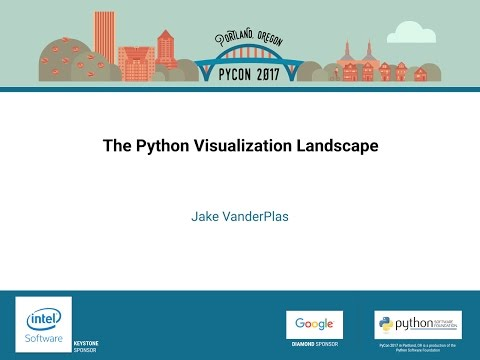

In [34]:
from IPython.display import YouTubeVideo
YouTubeVideo('FytuB8nFHPQ', start=240)

# Домашнее задание

Рассмотрим выборку фильмов, доступную в библиотеке bokeh. И построим ряд графиков.

In [35]:
# Около минуты будут скачиваться данные
# import bokeh.sampledata
# bokeh.sampledata.download()

In [36]:
import sqlite3 as sql
from bokeh.sampledata.movies_data import movie_path

Данные с фильмами скачались в виде SQLite базы данных с двумя табличками. Запросом извлечем часть фильмов.

In [37]:
query = '''
SELECT 
       -- omdb.ID,
          imdbID,
          Title,
          Year,
       -- omdb.Rating as mpaaRating,
       -- Runtime,
       -- Genre,
       -- Released,
       -- Director,
       -- Writer,
       -- omdb.Cast,
          imdbRating,
       -- imdbVotes,
       -- Language,
       -- Country,
          Oscars,
          tomatoes.Rating as numericRating,
       -- Meter,
          Reviews,
       -- Fresh,
       -- Rotten,
       -- userMeter,
          userRating,
       -- userReviews,
          BoxOffice,
          Production
FROM omdb, tomatoes
WHERE omdb.ID = tomatoes.ID 
  -- AND Year BETWEEN 1980 AND 2014
  -- AND Reviews >= 10
  -- AND BoxOffice IS NOT NULL
'''

with sql.connect(movie_path) as conn:
    movies = pd.read_sql(query, conn)
    
print(movies.shape)
movies.head()

(12569, 10)


,imdbID,Title,Year,imdbRating,Oscars,numericRating,Reviews,userRating,BoxOffice,Production
0,tt0004972,The Birth of a Nation,1915,6.9,0,8.0,38,3.3,NaN,Gravitas
1,tt0006206,Les vampires,1915,6.6,0,8.8,13,3.8,NaN,None
2,tt0006864,Intolerance: Love's Struggle Throughout the Ages,1916,8.0,0,8.0,28,3.8,NaN,Cohen Media Group
3,tt0009470,Over the Top,1918,NaN,0,4.4,11,2.8,NaN,
4,tt0009968,Broken Blossoms or The Yellow Man and the Girl,1919,7.7,0,8.2,20,3.7,NaN,Kino on Video


Как изменяются средние рейтинги фильмов у данной выборки по годам?

In [ ]:
%%opts NdOverlay [legend_position='left' width=500] Curve [tools=['hover']]

(movies.groupby('____')
       .agg({'__________': 'mean',
             '_____________': 'mean', 
             '__________': 'mean'})
       .stack().reset_index()
       .rename(columns={'level_1': 'type', 0: 'rating'})
       .pipe(hv.Dataset, kdims=['____', 'type'], vdims=['rating'])
       .to.curve('____', 'rating')
       .overlay()
)

:NdOverlay   [type]
   :Curve   [Year]   (rating)

Нарисовать диаграмму рассеивания в осях "рейтинг" / "сборы" для каждого года в отдельности.

In [ ]:
%%opts Scatter [tools=['hover'] show_grid=True logy=True color_index='Oscars' colorbar=True colorbar_position='left']
%%opts Scatter (cmap='viridis' size=5) [width=500 height=500]

(movies.query('Year >= 2000')
       .pipe(hv.Dataset, kdims=['__________', 'Year'], vdims=['_________', '______', '_____'])
       .to.scatter(kdims=['__________'], vdims=['_________', '______', '_____'])
)

:HoloMap   [Year]
   :Scatter   [imdbRating]   (BoxOffice,Oscars,Title)